# **Tunisian Used Car Price Prediction**

The goal of this project is to predict the price of used car in Tunisia by analyzing the car's features such as Brand , car model, fuel type, year, engine_size , vehicle_color, and Mileage.

**About the dataset:**

The "Tunisian Used Cars Data" is a comprehensive collection of data that offers valuable insights into the used car market across Tunisia.I got this dataset from kaggle "https://www.kaggle.com/datasets/yosrizayani/tunisian-used-cars-data" .
This dataset if for 4months ago

| Column Name | Description |
|------------------|------------------|
| Location | This is the location of car in Tunisia |
| time_posted| the time of the post of the car to be sold |
| Mileage|This contains the mileage of the specific car |
|vehicle_color|This present the color of the car|
|vehicle_condition|This describe the condition of the car if its new or used|
|engine_size|This feature contains the cylinder capacity with Litre|
|year|This year of the construction of the car|
|gearbox|Present the type of the gearbox : `Automatic` or `Manual`|
|brand|This feature present the car's company|
|model|Contains the model of the car related to the brand|
|car_body|This variable present the car's body like `break` or `SUV`|
|fuel|This feature contains the type of the fuel |
|horsepower|This feature present the number of CV|
|price|This is the target which is the price of car|

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("TN_used_cars_data.csv")
df.head()

,location,time_posted,Mileage,Vehicle_color,Price,Vehicle_condition,engine_size,year,gearbox,brand,model,car_body,fuel,horsepower
0,Tunis,a day ago,230000,Noir,48500.0,Avec kilométrage,1.8L,2008,Automatique,Mercedes-Benz,Classe C Coupe,Berline,Essence,11.0
1,Ariana,3 days ago,153.000,Noir,59000.0,Avec kilométrage,2.0L,2012,Automatique,Kia,Sportage,4 x 4,Essence,11.0
2,Sfax,3 days ago,42000,Orange,41500.0,Nouveau,<1.0L,2022,Manuelle,Kia,Picanto,Berline,Essence,4.0
3,Tunis,4 days ago,46000,Blanc,139000.0,Avec kilométrage,1.5L,2020,Automatique,BMW,Serie 1,Berline,Essence,8.0
4,La Manouba,5 days ago,75000,Noir,45000.0,Avec kilométrage,1.5L,2021,Automatique,MG,ZS,4 x 4,Essence,7.0


# **Data Preprocessing**

shape of the dataset

In [3]:
df.shape

(5395, 14)

The column's name of the dataset

In [4]:
df.columns

Index(['location', 'time_posted', 'Mileage', 'Vehicle_color', 'Price',
       'Vehicle_condition', 'engine_size', 'year', 'gearbox', 'brand', 'model',
       'car_body', 'fuel', 'horsepower'],
      dtype='object')

Dropping column's time_posted , as this dataset is for last 4 months so we dont need the time_posted for our analysis

In [5]:
df= df.drop(columns=['time_posted'], axis=1)

Column Data types

In [6]:
df.dtypes

,0
location,object
Mileage,object
Vehicle_color,object
Price,float64
Vehicle_condition,object
engine_size,object
year,object
gearbox,object
brand,object
model,object


Value counts for Catagorical variables

In [7]:
print(df['location'].value_counts())
print(df['Mileage'].value_counts())
print(df['Vehicle_color'].value_counts())
print(df['Vehicle_condition'].value_counts())
print(df['engine_size'].value_counts())
print(df['year'].value_counts())
print(df['gearbox'].value_counts())
print(df['brand'].value_counts())
print(df['model'].value_counts())
print(df['car_body'].value_counts())
print(df['fuel'].value_counts())

location
Tunis          1285
Ariana          768
Ben Arous       536
Sfax            440
Sousse          398
Nabeul          318
Monastir        209
Bizerte         205
La Manouba      174
Médenine        143
Mahdia          122
Kairouan        121
Gabès            73
Gafsa            69
Sidi Bouzid      66
Kasserine        64
Béja             58
Le Kef           57
Jendouba         51
Siliana          39
Tataouine        26
Zaghouan         18
Kébili           15
Tozeur           12
Name: count, dtype: int64
Mileage
200000     132
300000      76
100000      71
150000      66
250000      62
          ... 
64500        1
2010         1
53350        1
1320000      1
94           1
Name: count, Length: 1167, dtype: int64
Vehicle_color
Noir           1438
Blanc          1361
Gris           1214
Bleu            409
Rouge           274
Autre           158
Beige            88
Vert             81
Marron           76
Argent           47
Jaune            29
Doré             28
Orange           2

Droping useless rows

In [8]:
#Filtering rows for Mileage
df['Mileage'] = pd.to_numeric(df['Mileage'], errors="coerce")

df= df[(df['Mileage'])>=10000]

In [9]:
df = df[~df['Vehicle_condition'].str.contains('Pièces manquantes', na=False)]

In [10]:
#Filtering engine_size
#We see that the cylinder capacity has some values that are not real so we have to take only the values in [1.0,4.0]
patterns=['L','>','<','=']
for pattern in patterns:
  df['engine_size'] = df['engine_size'].str.replace(pattern,'',regex=False)
#convert into numeric values
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')

#Filter rows where  the cylinder capacity is between 1.0 and 4.0
df = df[(df['engine_size'] >= 1.0)& (df['engine_size'] <= 4.0)]

In [11]:
#filtering rows for year if the year is under 2000 we dont get the data
df['year'] = pd.to_numeric(df['year'], errors="coerce")
df = df[(df['year']>= 2000.0) & (df['year'] <=2024.0)]

In [12]:
#rows for brand has "Autres"
df = df[~df['brand'].str.contains('Autres', na=False)]

checking for null values percentage wise

In [13]:
df.isnull().sum()/df.shape[0]*100


,0
location,0.000000
Mileage,0.000000
Vehicle_color,0.050025
Price,0.000000
Vehicle_condition,0.175088
engine_size,0.000000
year,0.000000
gearbox,0.050025
brand,0.025013
model,0.250125


As we see , we have small percentage of the missing values , so we can handle them without droping the columns in our analysis

In [14]:
df=df.dropna()

In [15]:
for i in df.columns:
  print(i,df[i].nunique())

location 24
Mileage 733
Vehicle_color 17
Price 542
Vehicle_condition 4
engine_size 24
year 25
gearbox 2
brand 52
model 384
car_body 8
fuel 5
horsepower 118


In [16]:
#Since Location has no meaningful impact on the target (price) so we can remove it
df = df.drop(columns=['location'], axis=1)

In [17]:
#we can classify the color to four category: noir,blanc,gris,bleu and other(rare color)
main_colors=['Noir','Blanc','Gris']
df['Vehicle_color'] = df['Vehicle_color'].apply(lambda color: color if color in main_colors else 'Other')
print(df['Vehicle_color'].value_counts())

Vehicle_color
Noir     1114
Blanc    1029
Gris      932
Other     885
Name: count, dtype: int64


In [18]:
#Since we have horsepower so we can drop the engine_size (because horsepower and engine_size are correlated)
df = df.drop(columns=['engine_size'], axis=1)

In [19]:
#we will make a four categories for the brand: luxury_brands, mid-range brands, economy brands and others
luxury_brands = [
    'Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Jaguar', 'Land Rover',
    'Volvo', 'Lexus', 'Bentley', 'Lincoln', 'Hummer', 'Cadillac'
]

mid_range_brands = [
    'Volkswagen', 'Ford', 'Toyota', 'Hyundai', 'Kia', 'Mazda', 'Nissan',
    'Seat', 'Chevrolet', 'Opel', 'Skoda', 'Mini', 'Honda'
]

economy_brands = [
    'Peugeot', 'Renault', 'Citroen', 'Fiat', 'Suzuki', 'Dacia', 'Chery',
    'MG', 'Mahindra', 'Ssangyong', 'Geely', 'Dongfeng', 'Baic',
    'Changhe', 'Foton', 'Acrea', 'Daewoo', 'Wallyscar', 'Isuzu'
]

other_brands = ['Autres']  # Handle miscellaneous or unclassified brands


In [20]:
def classify_brand(brand):
  if brand in luxury_brands:
    return 'Luxury'
  elif brand in mid_range_brands:
    return 'Mid-Range'
  elif brand in economy_brands:
    return 'Economy'
  else:
    return 'Other'

In [21]:
df['Brand_Category'] = df['brand'].apply(classify_brand)
print(df[['brand','Brand_Category']].head(10))

            brand Brand_Category
0   Mercedes-Benz         Luxury
2             Kia      Mid-Range
3             BMW         Luxury
4              MG        Economy
5             BMW         Luxury
6              MG        Economy
7         Peugeot        Economy
8            Seat      Mid-Range
10            BMW         Luxury
11     Volkswagen      Mid-Range


In [22]:
df.describe()

,Mileage,Price,year,horsepower
count,3.960000e+03,3960.000000,3960.000000,3.960000e+03
mean,6.706888e+06,57138.600227,2015.015152,3.201935e+05
std,2.358834e+08,57509.110637,5.644676,1.607367e+07
min,1.000000e+04,1000.000000,2000.000000,-5.000000e+00
25%,8.118375e+04,28500.000000,2011.000000,5.000000e+00
50%,1.400000e+05,42000.000000,2017.000000,6.000000e+00
75%,2.000000e+05,65000.000000,2020.000000,8.000000e+00
max,1.000000e+10,999999.000000,2024.000000,1.000000e+09


In [23]:
df.head(5)

,Mileage,Vehicle_color,Price,Vehicle_condition,year,gearbox,brand,model,car_body,fuel,horsepower,Brand_Category
0,230000.0,Noir,48500.0,Avec kilométrage,2008.0,Automatique,Mercedes-Benz,Classe C Coupe,Berline,Essence,11.0,Luxury
2,42000.0,Other,41500.0,Nouveau,2022.0,Manuelle,Kia,Picanto,Berline,Essence,4.0,Mid-Range
3,46000.0,Blanc,139000.0,Avec kilométrage,2020.0,Automatique,BMW,Serie 1,Berline,Essence,8.0,Luxury
4,75000.0,Noir,45000.0,Avec kilométrage,2021.0,Automatique,MG,ZS,4 x 4,Essence,7.0,Economy
5,204000.0,Other,52500.0,Avec kilométrage,2011.0,Manuelle,BMW,Serie 3 GT,Berline,Diesel,6.0,Luxury


# **Exploratory Data Analysis**

In the exploratory data analysis, i will be looking at the distribution of the data across all the columns, in order to understand the data in better way.After that i will be looking at the relationship between the target variable and the independent variables.

**Car Company**

<ipython-input-24-96895da2df07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index, palette='Set1')


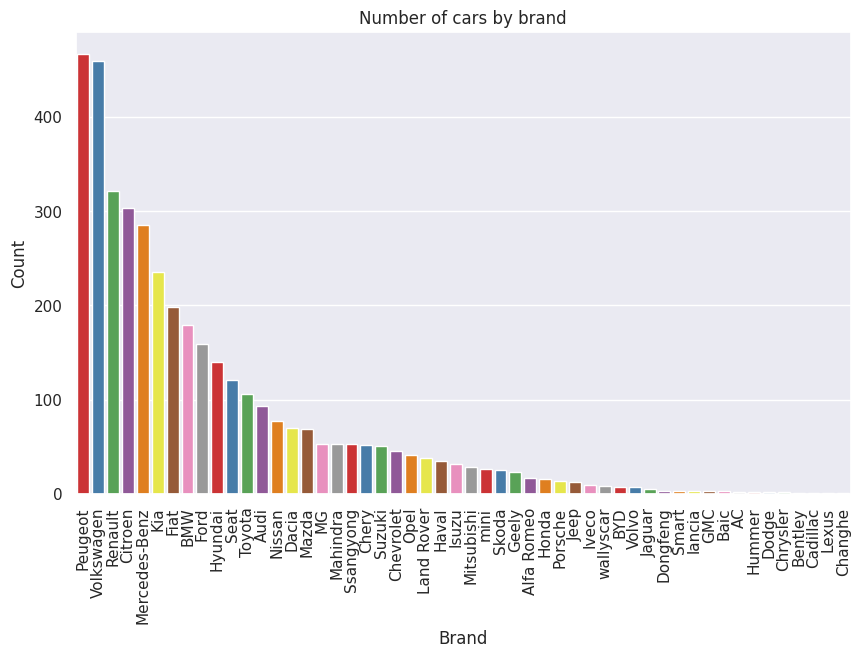

In [24]:
#Number of cars by brand
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index, palette='Set1')
plt.xticks(rotation=90)
plt.title('Number of cars by brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


From this graph , we get know about the distribution of the cars in the dataset from different brands.We have a total of 52 brand's name,as we see the top brands in Tunisia are : `Peugeot`,`Volkswagen`,`Renault`,`Citroen`,`Mercedes-Benz`,`Kia`,`Fiat`,`BMW` and others.

**Top 10 Car Models**

<ipython-input-25-ed46589946f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['model'], order=df['model'].value_counts().iloc[:10].index, palette='Set1')


Text(0.5, 1.0, 'TOP 10 Car Models')

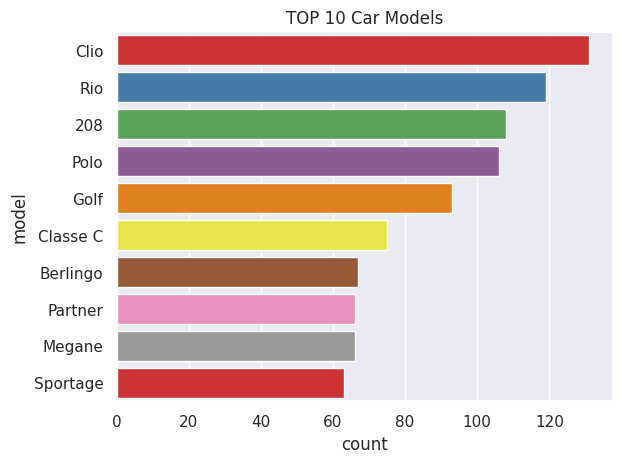

In [25]:
sns.countplot(df['model'], order=df['model'].value_counts().iloc[:10].index, palette='Set1')
plt.title('TOP 10 Car Models')

We see that the top models are Clio , followed by Rio are the most car models in our dataset which we can conclure that those models are durable and robust with highly demand in Tunisia

**Car Fuel Type**

<ipython-input-26-99185f73886d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=df, palette='Set1')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

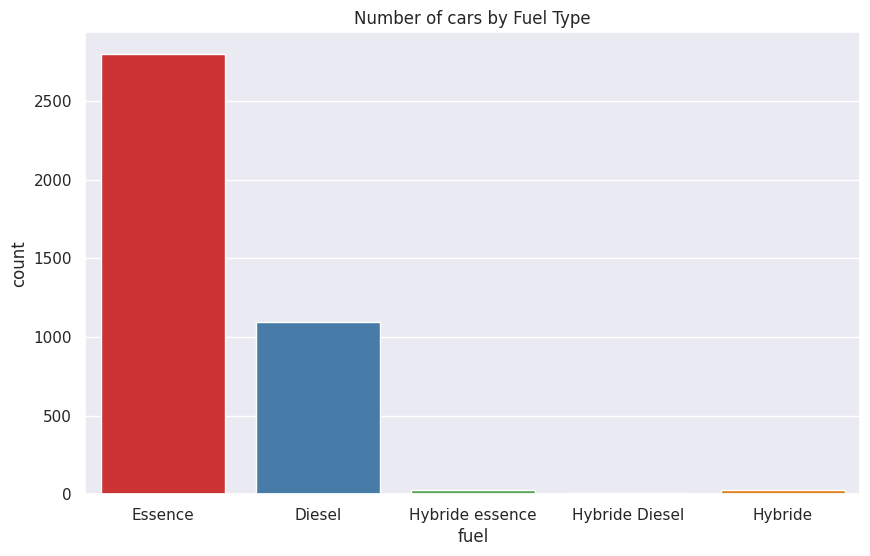

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='fuel', data=df, palette='Set1')
plt.title('Number of cars by Fuel Type')

Majority of the resale cars are working with 'Petrol'(essence) which present more than 2500, and more than 1000 for the Diesel.

Top 10 Colors

<ipython-input-27-b7879ff1749f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle_color',data=df, order=df['Vehicle_color'].value_counts().iloc[:10].index, palette='Set2')


Text(0.5, 1.0, 'Top 10 Car Colors')

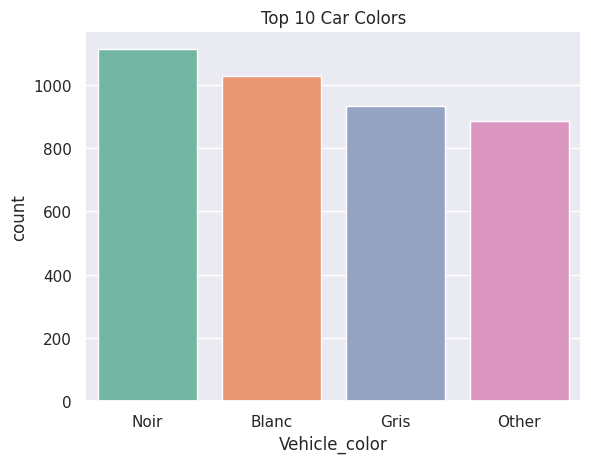

In [27]:
sns.countplot(x='Vehicle_color',data=df, order=df['Vehicle_color'].value_counts().iloc[:10].index, palette='Set2')
plt.title('Top 10 Car Colors')

As we see , the Black and White are the most demand colors at the market.

Mileage view

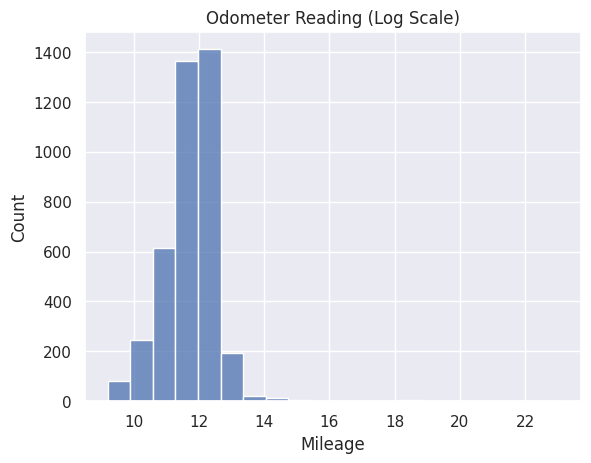

In [28]:
# Apply log transformation and plot (we will use the log1p because the mileage has a large number)
sns.histplot(np.log1p(df['Mileage']), bins=20).set_title('Odometer Reading (Log Scale)')
plt.show()

Most of cars has the mileage in the range of [exp(10) and exp(13)]

**Vehicle Body**

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Berline'),
  Text(1, 0, '4 x 4'),
  Text(2, 0, 'Compacte'),
  Text(3, 0, 'Autres'),
  Text(4, 0, 'Monospace'),
  Text(5, 0, 'Utilitaire'),
  Text(6, 0, 'Pick up'),
  Text(7, 0, 'Cabriolet')])

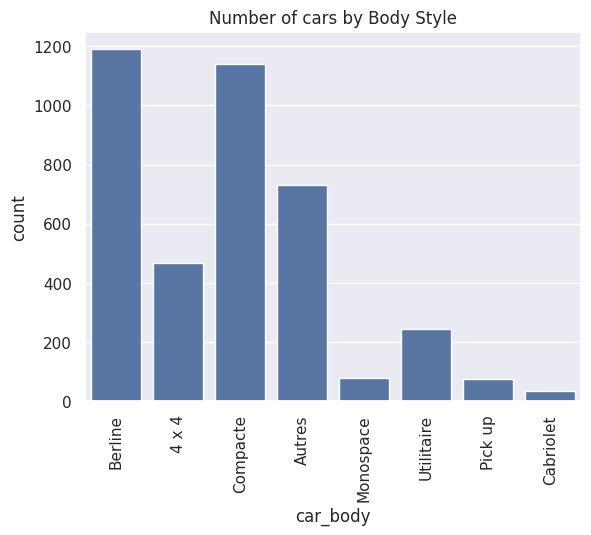

In [29]:
sns.countplot(x='car_body',data=df)
plt.title('Number of cars by Body Style')
plt.xticks(rotation=90)

The most of the cars have Berline and compact cars.So the most car body is highly demanded in the market is the compact and berline cars.

**The Age Distribution**

In [30]:
df['age'] = 2024- df['year']

Text(0.5, 1.0, 'Car age Distribution')

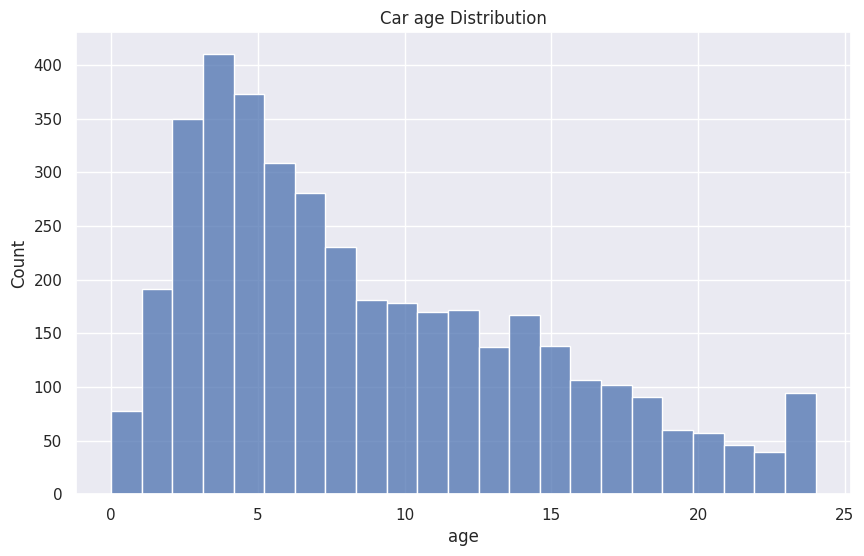

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(x='age', data=df, bins=23)
plt.title('Car age Distribution')

The age of most of the cars are between 3 and 5 years.

**Price Distribution**

Text(0.5, 1.0, 'Car Price Distribution')

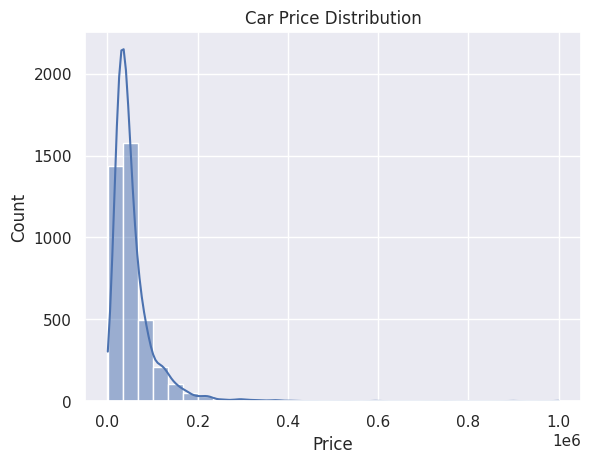

In [32]:
sns.histplot(x='Price', data=df,kde=True, bins=30)
plt.title('Car Price Distribution')

The graph show that the car price are arround 10000DT.So we can assume that the most demanded car are arround 0.1 le6 and 0.2 le6

**Top 10 Cars Brand by Price**

Text(0.5, 1.0, 'Top 10 Car brands by Price')

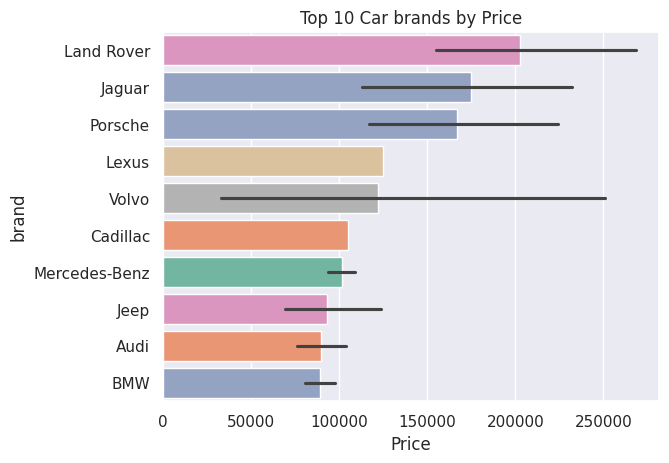

In [33]:
sns.barplot(y='brand', x='Price', data=df, order=df.groupby('brand')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue='brand', palette='Set2')
plt.title('Top 10 Car brands by Price')

As we see this graph presente the top 10 car companies in the dataset with highest resale value.The Land Rover, Jaguar , Porche are the top 3 car companies with highest resale value, since these are luxury car companies.

**Top 10 car Models by price**

Text(0.5, 1.0, 'Top 10 Car body by Price')

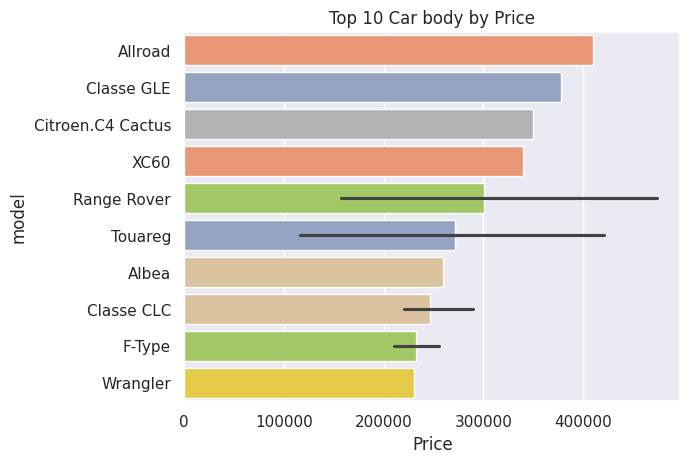

In [34]:
sns.barplot(y='model', x='Price', data=df, order=df.groupby('model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue='model', palette='Set2')
plt.title('Top 10 Car body by Price')

Car Fuel Type and Price

Text(0.5, 1.0, 'Price by Fuel Type')

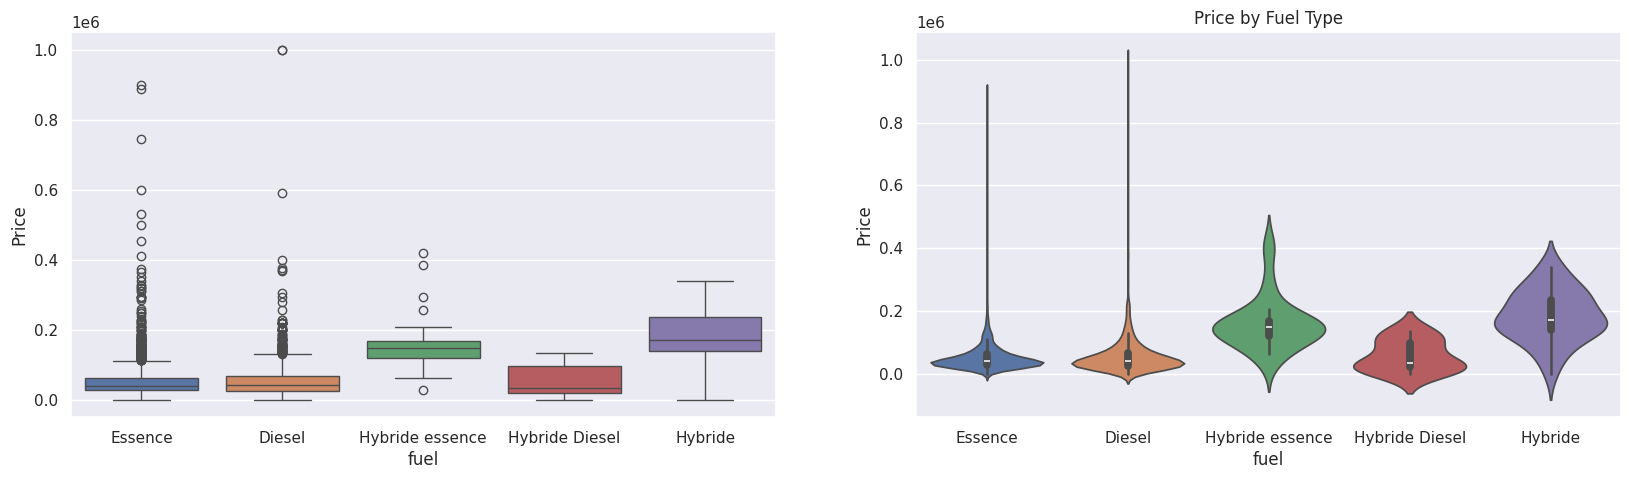

In [35]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x='fuel', y='Price', data=df, ax=ax[0],hue='fuel')
plt.title('Price by Fuel Type')
sns.violinplot(x='fuel', y='Price', data=df, ax=ax[1], hue='fuel')
plt.title('Price by Fuel Type')

The above plots visualizes the relationship between the car fuel type and its resale value.In the boxplot we can see than cars with Hybride fuel type have higher Price value than Petrol and Diesel.In the violin plot, we can visualize that the distribution for hybride cars is more concentrated between 0.1 and 0.4le10 DT .From this plot, we can conclure that customers prefer Hybride and Hybride essence fuel cars more than Petrol and Diesel.

**Top 10 car colors by Price**

Text(0.5, 1.0, 'Top 10 car Color by Price')

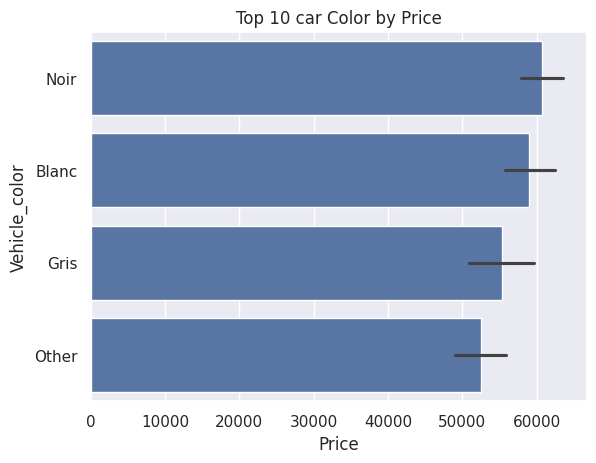

In [36]:
sns.barplot(y='Vehicle_color', x='Price', data=df, order=df.groupby('Vehicle_color')['Price'].mean().sort_values(ascending=False).iloc[:10].index)
plt.title('Top 10 car Color by Price')

The cars with Colors: black , white and Grey are the most resale cars in used cars market.

# Odometer Reading and Price

Text(0.5, 1.0, 'Odometer Reading Price')

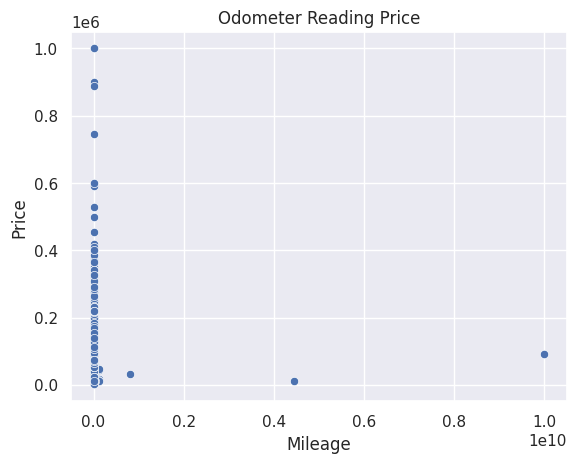

In [37]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Odometer Reading Price')

In [38]:
# Identify the outliers
print(df['Mileage'].describe())  # Check the data distribution

# Set a reasonable upper limit for Mileage (e.g., 1,000,000 km or adjust based on domain knowledge)
df = df[df['Mileage'] <= 1000000]

# Verify the cleaned data
print(df['Mileage'].describe())


count    3.960000e+03
mean     6.706888e+06
std      2.358834e+08
min      1.000000e+04
25%      8.118375e+04
50%      1.400000e+05
75%      2.000000e+05
max      1.000000e+10
Name: Mileage, dtype: float64
count      3925.000000
mean     153913.308841
std      103784.395244
min       10000.000000
25%       80000.000000
50%      139000.000000
75%      200000.000000
max      999999.000000
Name: Mileage, dtype: float64


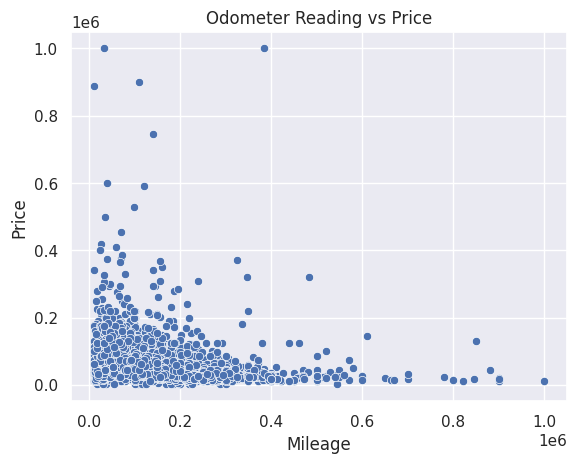

In [39]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Odometer Reading vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In the scatter plot we can see that the data is concentrated near the origin, which means that most of the cars have odometers reading less than 0.2le6(200,000 km).Also the cars with less odometers shows a high price for the resale which is a normal because the odometers is low the price is high.

**Car Body and Price**

Text(0.5, 1.0, 'Price by Car Body')

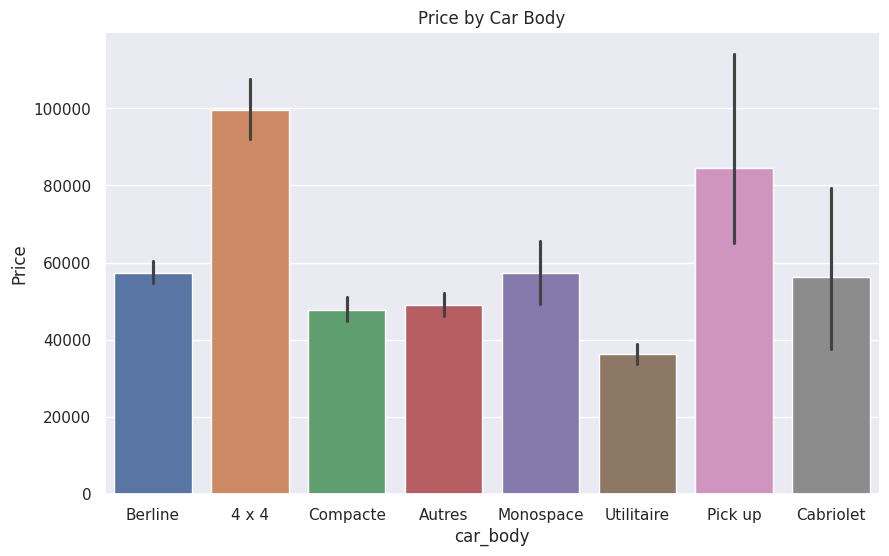

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'car_body', y='Price', data=df, hue='car_body')
plt.title('Price by Car Body')


4x4, Pick up and Monospace are the top 3 car body styles with the  highest resale value.So those car body are the most preferred in the used car market and have a good resale value.

# **Car Age and Price**

Text(0.5, 1.0, 'Car age and Price')

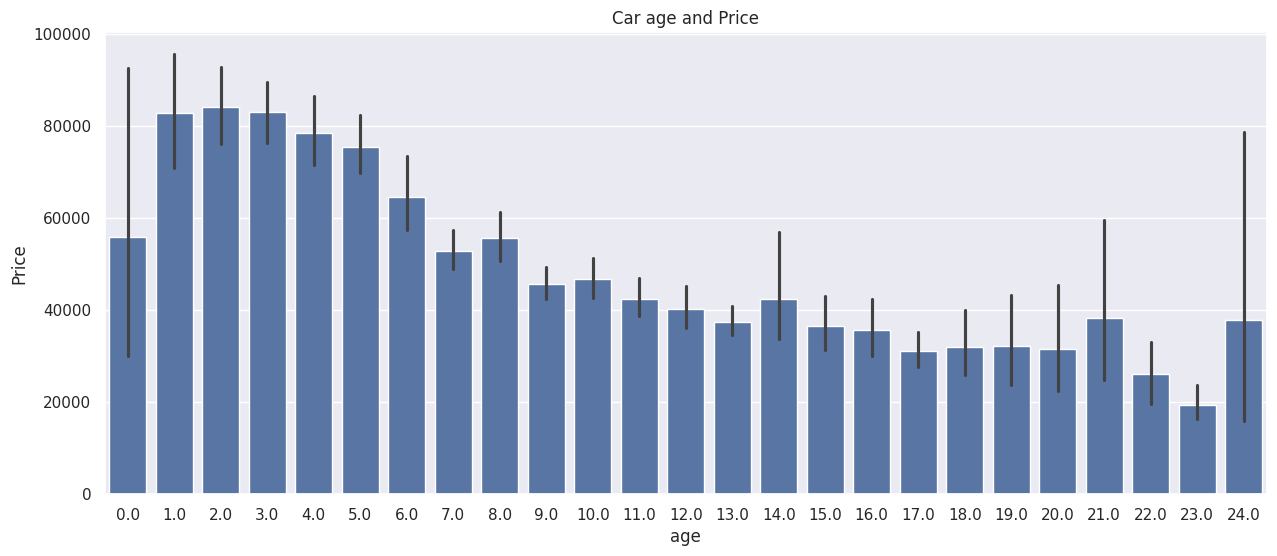

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x='age', y='Price',data=df)
plt.title('Car age and Price')

The Graph shows that the age play a crucial role in the price of the car, age is low the price is so high, and when the age is increasing the price is decreasing.

In [42]:
df.head()

,Mileage,Vehicle_color,Price,Vehicle_condition,year,gearbox,brand,model,car_body,fuel,horsepower,Brand_Category,age
0,230000.0,Noir,48500.0,Avec kilométrage,2008.0,Automatique,Mercedes-Benz,Classe C Coupe,Berline,Essence,11.0,Luxury,16.0
2,42000.0,Other,41500.0,Nouveau,2022.0,Manuelle,Kia,Picanto,Berline,Essence,4.0,Mid-Range,2.0
3,46000.0,Blanc,139000.0,Avec kilométrage,2020.0,Automatique,BMW,Serie 1,Berline,Essence,8.0,Luxury,4.0
4,75000.0,Noir,45000.0,Avec kilométrage,2021.0,Automatique,MG,ZS,4 x 4,Essence,7.0,Economy,3.0
5,204000.0,Other,52500.0,Avec kilométrage,2011.0,Manuelle,BMW,Serie 3 GT,Berline,Diesel,6.0,Luxury,13.0


In [43]:
df = df.drop(columns=['Vehicle_condition','year','brand'], axis=1)

In [44]:
df = df.drop(columns=['model'], axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3925 entries, 0 to 5394
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mileage         3925 non-null   float64
 1   Vehicle_color   3925 non-null   object 
 2   Price           3925 non-null   float64
 3   gearbox         3925 non-null   object 
 4   car_body        3925 non-null   object 
 5   fuel            3925 non-null   object 
 6   horsepower      3925 non-null   float64
 7   Brand_Category  3925 non-null   object 
 8   age             3925 non-null   float64
dtypes: float64(4), object(5)
memory usage: 306.6+ KB


**Label Encoding**

In [46]:
#columns for label Encoding:
cols= df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for i in cols:
  le.fit(df[i])
  df[i] = le.transform(df[i])
  print(i,df[i].unique())

Vehicle_color [2 3 0 1]
gearbox [0 1]
car_body [2 0 4 1 5 7 6 3]
fuel [1 0 4 3 2]
Brand_Category [1 2 0 3]


**Outlier Removal**

In [47]:
#Using IQRS to remove outliers
#Columns for outliers removal
cols= df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3- Q1
#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 *IQR)) | (df[cols]> (Q3+ 1.5* IQR))).any(axis=1)]

**Correlation Matrix Heatmap**

<Axes: >

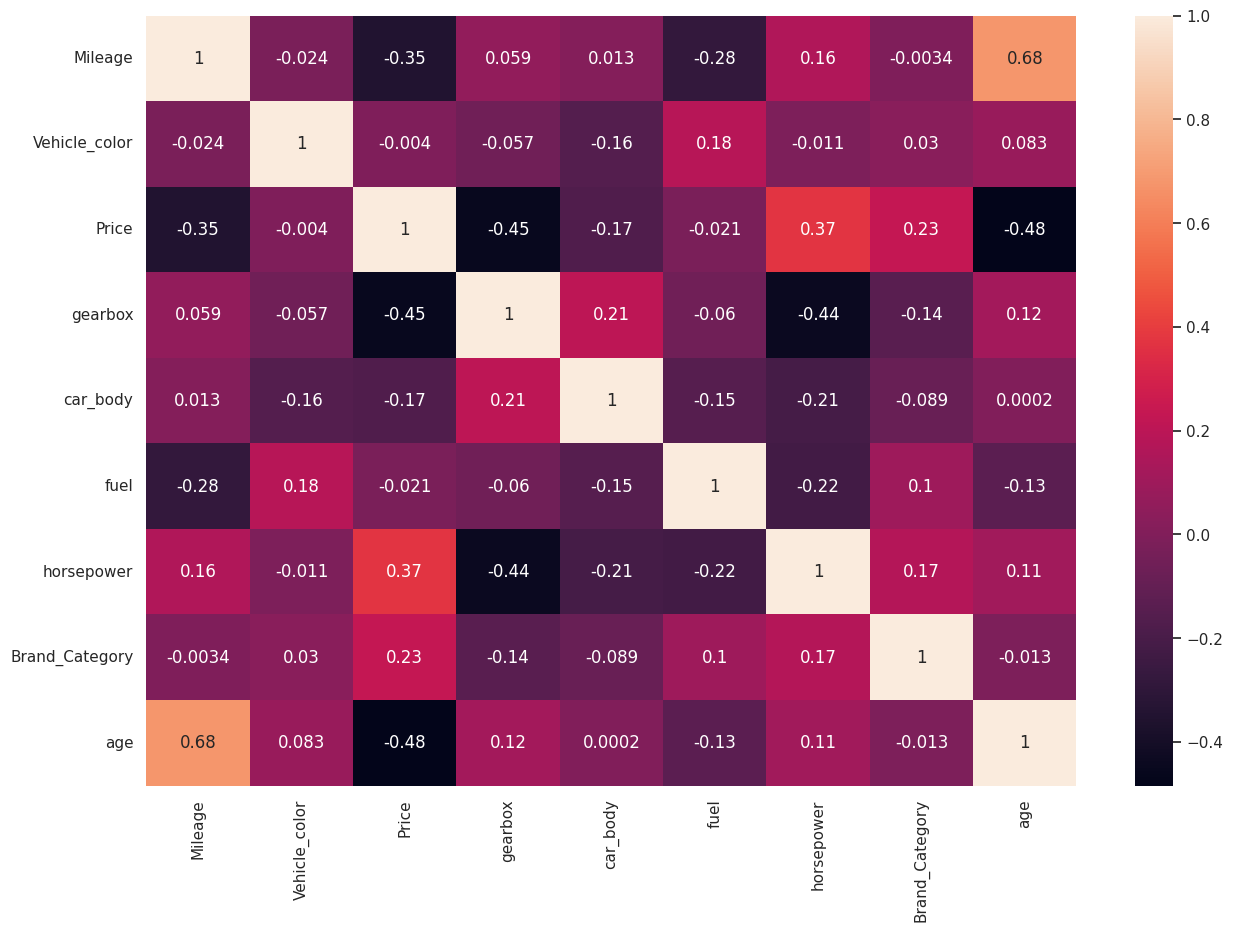

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

# **Train Test Split**

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

# **Model Building**

I will use the following regresion models:


*   Decision Tree Regressor
*   Random Forest Regressor
*   Ridge Regressor



# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

**Hyperparameters Tuning**

In [51]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search

para = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8,10,12,14],
    'min_samples_split': [2,4,6,8],
    'random_state': [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator= dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(x_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


In [51]:
#decision tree regressor with best parameters

dtr= DecisionTreeRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=2, random_state=0)

dtr.fit(x_train, y_train)

#Training score
print(dtr.score(x_train,y_train))

0.6170977566279378


In [52]:
#Prediction
dtr_pred = dtr.predict(x_test)

# Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search

para= {
    'max_depth': [2,4,6,8,10,12,14],
    'min_samples_leaf': [2,4,6,8,10,12,14],
    'min_samples_split': [2,4,6,8,10,12,14],
    'random_state': [0,42,52]
}

grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(x_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 1029 candidates, totalling 5145 fits


In [54]:
#random Forest Regressor with best parameters

rfr = RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=8, random_state= 42)
#Fitting the model
rfr.fit(x_train, y_train)

#Training Score

print(rfr.score(x_train, y_train))

0.8193332047361901


In [55]:
#Prediction
rfr_pred = rfr.predict(x_test)

# Model Evaluation

**Plot Distribution**

<ipython-input-56-a58666a19c95>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= y_test, ax=ax[0], color='r', hist=False, label='Actual')
<ipython-input-56-a58666a19c95>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = dtr_pred, ax= ax[0], color='b', hist=False, label='P

<Axes: title={'center': 'Random Forest Regressor'}, ylabel='Density'>

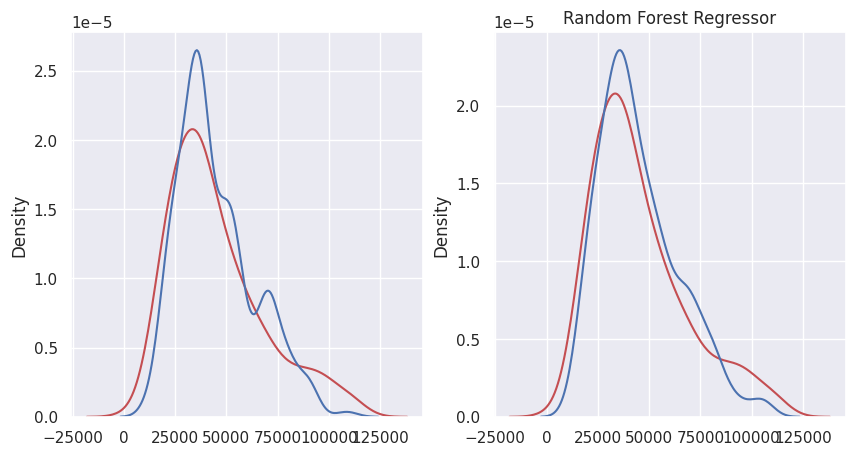

In [56]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

#decision tree regressor
sns.distplot(x= y_test, ax=ax[0], color='r', hist=False, label='Actual')
plt.title("Decision Tree Regressor")
sns.distplot(x = dtr_pred, ax= ax[0], color='b', hist=False, label='Predicted')

#random forest regressor
sns.distplot(x= y_test, ax= ax[1], color='r', hist=False, label='Actual')
plt.title("Random Forest Regressor")
sns.distplot(x = rfr_pred, ax= ax[1], color='b', hist=False, label='Predicted')

**Model Metrics**

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Decision Tree Regressor
print('Decision Tree Regressor')
print('Mean Squared Error:', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, dtr_pred))
print('R2 score:', r2_score(y_test, dtr_pred))

#Random Forest Regressor
print('Random Forest Regressor')
print('Mean Squared Error', mean_squared_error(y_test, rfr_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, rfr_pred))
print("R2 Score:", r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error: 220921856.44027972
Mean Absolute Error: 10248.22507805215
R2 score: 0.5944748152077145
Random Forest Regressor
Mean Squared Error 171121739.91205156
Mean Absolute Error: 8827.274027568108
R2 Score: 0.6858881401869309


**Feature Importance**

Text(0.5, 1.0, 'Random Forest Regressor')

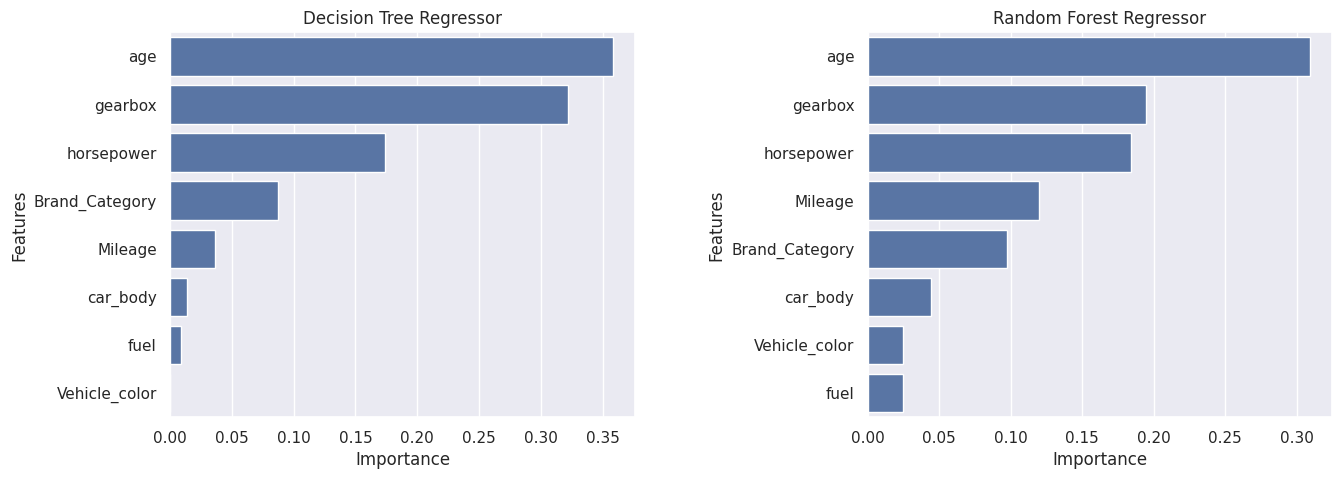

In [58]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':x_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':x_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

# **Deep Learning Regression**

In [66]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = Sequential([
    Dense(64, activation='relu', input_dim=x_train.shape[1]), #input layer
    Dropout(0.2), #Regularization
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1) #Output layer
 ])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2534498048.0000 - mae: 45029.2852 - val_loss: 2561046784.0000 - val_mae: 44921.1406
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2433150208.0000 - mae: 43973.8438 - val_loss: 2099730816.0000 - val_mae: 40187.3984
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1788135680.0000 - mae: 36552.6328 - val_loss: 666923712.0000 - val_mae: 20385.0391
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 507152352.0000 - mae: 17259.0273 - val_loss: 287007424.0000 - val_mae: 12178.1777
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 366787168.0000 - mae: 13817.1982 - val_loss: 274706720.0000 - val_mae: 11831.7070
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 355975328.0000 - mae: 13700.1953 - val_loss: 268066224.0000 - val_mae: 11639.7607
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321303360.0000 - mae: 13056.8574 - val_loss: 259529760.0000 - val_mae: 11473.5049
Epoch 8/

Model Evaluation

In [68]:
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(" test mae{}".format(mae))


 test mae10355.0927734375


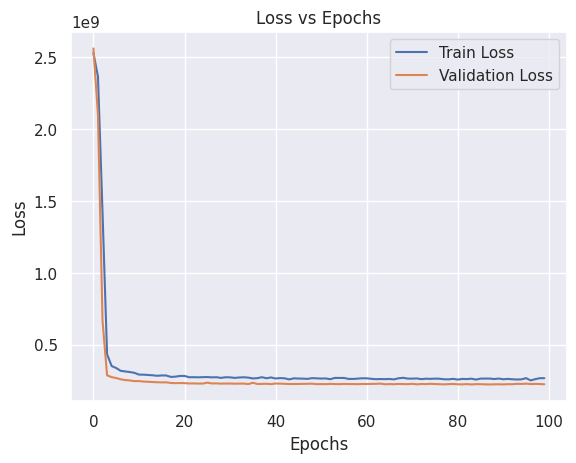

In [69]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
# Calculate the range of the target variable
target_range = y_test.max() - y_test.min()

# Calculate the percentage MAE
percentage_mae = (mae / target_range) * 100

print(f"MAE: {mae:.2f}")
print(f"Target Range: {target_range:.2f}")
print(f"Percentage of MAE to Target Range: {percentage_mae:.2f}%")


MAE: 10355.09
Target Range: 117889.00
Percentage of MAE to Target Range: 8.78%


# **Hyperparameters Tuning**

In [75]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [77]:
import keras_tuner as kt
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

def build_model(hp):

  model = Sequential([
      Dense(hp.Int('units_input', min_value=32, max_value=128, step=32), activation='relu', input_dim=x_train.shape[1]),
      Dropout(hp.Float('dropout_input', 0.0, 0.5, step=0.1)),
      Dense(hp.Int('units_hidden_1', min_value=32, max_value=256, step=32), activation='relu'),
      Dropout(hp.Float('dropout_hidden_1', 0.0, 0.5, step=0.1)),
      Dense(hp.Int('units_hidden_2', min_value=32, max_value=256, step=32), activation='relu'),
      Dropout(hp.Float('dropout_hidden_2',0.0, 0.5, step=0.1)),
      Dense(1)
  ])

  model.compile(optimizer=Adam(learning_rate= hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                loss='mse',
                metrics=['mae']
                )
  return model

In [78]:
tunner = kt.Hyperband(
    build_model,
    objective='val_mae',
    max_epochs=50,
    factor=3,
    directory='my_tuning',
    project_name='regression_tuning'
)

early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tunner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])
best_hps  = tunner.get_best_hyperparameters(num_trials=1)[0]


Trial 90 Complete [00h 00m 27s]
val_mae: 45124.4296875

Best val_mae So Far: 10197.78515625
Total elapsed time: 00h 12m 40s


In [79]:
best_model = tunner.hypermodel.build(best_hps)
history= best_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1 )


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2498369280.0000 - mae: 44812.3555 - val_loss: 2462284288.0000 - val_mae: 43823.7812
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2188679680.0000 - mae: 40969.8438 - val_loss: 773569280.0000 - val_mae: 21406.5996
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 549302400.0000 - mae: 17431.1055 - val_loss: 279494144.0000 - val_mae: 11952.0430
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 330822912.0000 - mae: 13135.1943 - val_loss: 266762704.0000 - val_mae: 11535.1855
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 354114784.0000 - mae: 13338.8525 - val_loss: 260751136.0000 - val_mae: 11346.8008
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 332606720.0000 - mae: 12917.0967 - val_loss: 253627856.0000 - val_mae: 11152.0674
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 294320704.0000 - mae: 12358.3008 - val_loss: 248110480.0000 - val_mae: 11026.0215
Epoch 8/50
83/83 ━━━━━━━━━━━

In [80]:
loss, mae = best_model.evaluate(x_test, y_test, verbose=0)
print('Test MAE{}'.format(mae))


Test MAE10400.7880859375


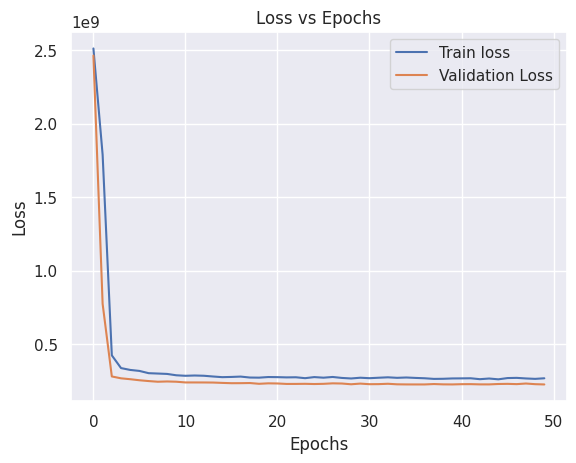

In [81]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
# Calculate the range of the target variable
target_range = y_test.max() - y_test.min()

# Calculate the percentage MAE
percentage_mae = (mae / target_range) * 100

print(f"MAE: {mae:.2f}")
print(f"Target Range: {target_range:.2f}")
print(f"Percentage of MAE to Target Range: {percentage_mae:.2f}%")


MAE: 10400.79
Target Range: 117889.00
Percentage of MAE to Target Range: 8.82%


In [83]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(x_test)

r2= r2_score(y_test, y_pred)
print("R2 score : {}".format(r2))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R2 score : 0.586813895186391


# **Conclusion**

Well from the exploratory data analysis, I have revealed two major facts about the used car market which are : the price and demand.The low price used car are higher than expensive ones.Also , there are a category that want to buy the luxury cars(expensive cars) such as Land Rover, Juguar , Porsche.

Majority of cars in Tunisia run with petrol and Diesel and some of them works with hybrid (electrical and fuel).The most demanded colors are : black , white and grey.

Cars with bodystyle like 4x4 and pickup are most preferred by the customers.

Finally, i have used many machine learning algorithm and deep learning algorithm.In ML i have used Decision Tree regressor and random forest regressor model in order to predict the car price.The random forest regressor performed better than the decision tree regressor model.